In [24]:
import pandas as pd
import numpy as np 


In [25]:
df = pd.read_csv('Iris.csv')

In [26]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [27]:
df = df.iloc[:,1:]

In [28]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [30]:
df["Species"] = encoder.fit_transform(df["Species"])

In [31]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [32]:
df = df[df["Species"]!=0][["SepalWidthCm", "PetalLengthCm", "Species"]]

In [33]:
df.head(3)

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

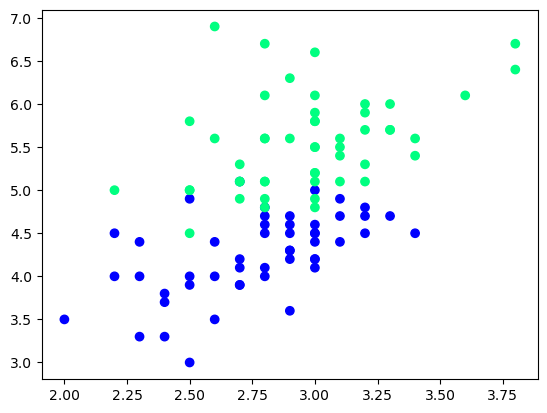

In [35]:
plt.scatter(df["SepalWidthCm"], df["PetalLengthCm"] ,c = df['Species'] , cmap= 'winter')

In [36]:
df # here data are in perticulare order 1-50 1 and 51 -rest = 2 

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [45]:
df = df.sample(100) # but here we divide the data in random pattern

In [46]:
df_train = df.iloc[:60, :].sample(10)
df_val =  df.iloc[60:80, :].sample(5)
df_test =  df.iloc[80:, :].sample(5)

In [47]:
df_train

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
116,3.0,5.5,2
98,2.5,3.0,1
61,3.0,4.2,1
109,3.6,6.1,2
97,2.9,4.3,1
64,2.9,3.6,1
93,2.3,3.3,1
60,2.0,3.5,1
103,2.9,5.6,2


In [48]:
df_val

,SepalWidthCm,PetalLengthCm,Species
122,2.8,6.7,2
111,2.7,5.3,2
54,2.8,4.6,1
134,2.6,5.6,2
126,2.8,4.8,2


In [49]:
df_test

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
92,2.6,4.0,1
132,2.8,5.6,2
78,2.9,4.5,1
55,2.8,4.5,1


In [50]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [51]:
x_test

array([[2.8, 6.7],
       [2.7, 5.3],
       [2.8, 4.6],
       [2.6, 5.6],
       [2.8, 4.8]])

In [52]:
y_test

array([2, 2, 1, 2, 2])

## BAGGILNG

In [53]:
# here we have 3 base model and we are going to train on decision tree 

In [54]:
df_bag = df_train.sample(8, replace = True)

x= df_bag.iloc[:, 0:2]
y= df_bag.iloc[:,-1]

In [55]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
116,3.0,5.5,2
66,3.0,4.5,1
109,3.6,6.1,2
116,3.0,5.5,2
103,2.9,5.6,2
64,2.9,3.6,1
61,3.0,4.2,1
116,3.0,5.5,2


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [57]:
dt_bag1 = DecisionTreeClassifier()

In [58]:
def evaluate(clf, x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf = clf, legend  = 2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

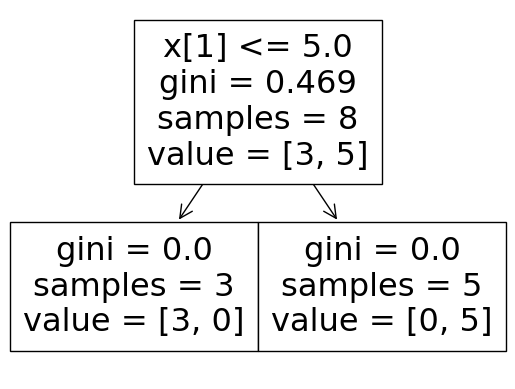

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


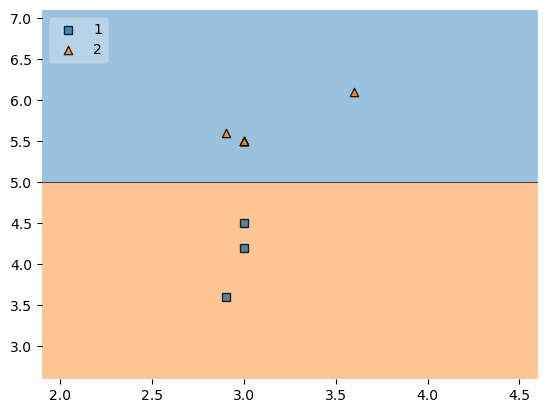

In [59]:
evaluate(dt_bag1 , x,y)

In [60]:
df_bag = df_train.sample(8, replace = True)

x= df_bag.iloc[:, 0:2]
y= df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
98,2.5,3.0,1
109,3.6,6.1,2
60,2.0,3.5,1
98,2.5,3.0,1
60,2.0,3.5,1
103,2.9,5.6,2
103,2.9,5.6,2
93,2.3,3.3,1


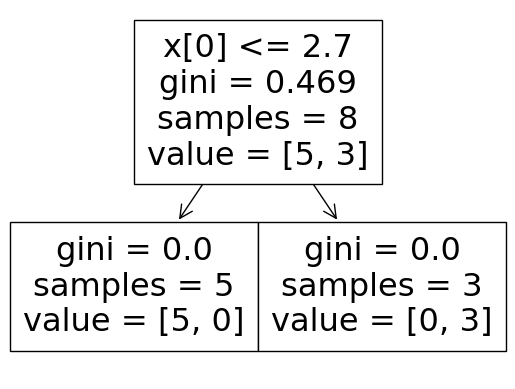

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


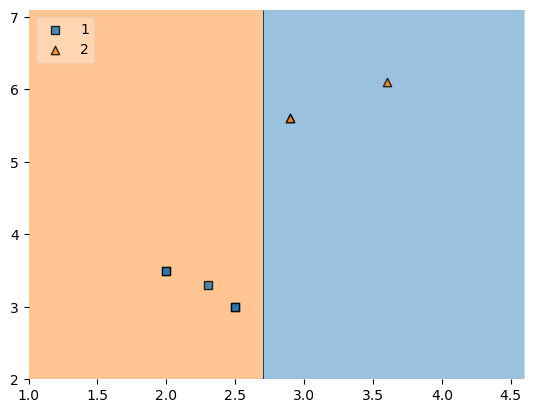

In [61]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2 , x,y)

In [62]:
df_bag = df_train.sample(8, replace = True)

x= df_bag.iloc[:, 0:2]
y= df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
97,2.9,4.3,1
93,2.3,3.3,1
97,2.9,4.3,1
66,3.0,4.5,1
109,3.6,6.1,2
116,3.0,5.5,2
64,2.9,3.6,1


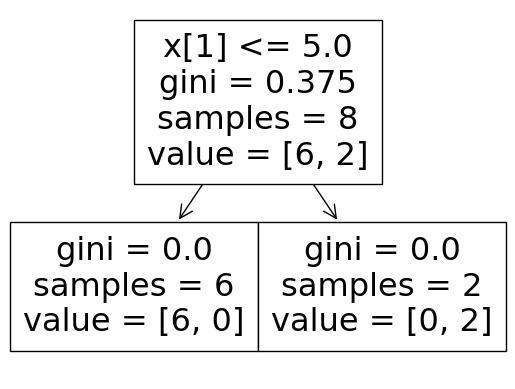

C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


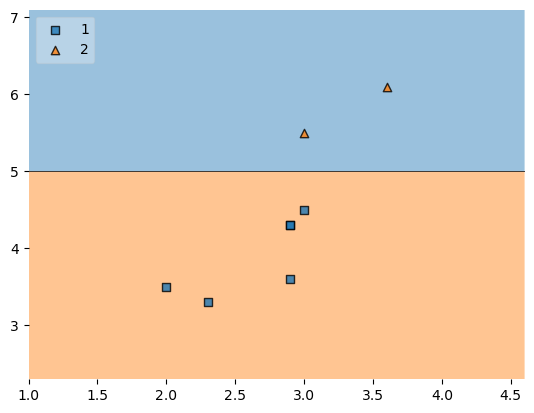

In [63]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3 , x,y)

In [64]:
df_test

,SepalWidthCm,PetalLengthCm,Species
137,3.1,5.5,2
92,2.6,4.0,1
132,2.8,5.6,2
78,2.9,4.5,1
55,2.8,4.5,1


In [66]:
print("Predictor 1", dt_bag1.predict(np.array([2.8,4.5]).reshape(1,2)))
print("Predictor 2", dt_bag1.predict(np.array([2.8,4.5]).reshape(1,2)))
print("Predictor 3", dt_bag1.predict(np.array([2.8,4.5]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## PASTING

In [67]:
# this is also known as row sampleing but with out repetation 

In [68]:
df_train

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
116,3.0,5.5,2
98,2.5,3.0,1
61,3.0,4.2,1
109,3.6,6.1,2
97,2.9,4.3,1
64,2.9,3.6,1
93,2.3,3.3,1
60,2.0,3.5,1
103,2.9,5.6,2


In [69]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
98,2.5,3.0,1
64,2.9,3.6,1
116,3.0,5.5,2
97,2.9,4.3,1
60,2.0,3.5,1
93,2.3,3.3,1
66,3.0,4.5,1
103,2.9,5.6,2


## RANDOM SUBSPACES

In [ ]:
# here we donot do row sampling we do column samping

In [72]:
df1 = df = pd.read_csv('Iris.csv')

In [73]:
df1 = df1.sample(10)

In [74]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
41,42,4.5,2.3,1.3,0.3,Iris-setosa
30,31,4.8,3.1,1.6,0.2,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
119,120,6.0,2.2,5.0,1.5,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


In [79]:
df1.sample(2, replace = True, axis =1 ) # here 2 is for no of column and replace for repeting the row and 
# axis = 1 for column 

,PetalWidthCm,Species
57,1.0,Iris-versicolor
145,2.3,Iris-virginica
136,2.4,Iris-virginica
120,2.3,Iris-virginica
0,0.2,Iris-setosa
41,0.3,Iris-setosa
30,0.2,Iris-setosa
125,1.8,Iris-virginica
119,1.5,Iris-virginica
50,1.4,Iris-versicolor


## RANDOM PATCHES

In [80]:
# here we can do row samplimg and column sampling as well 

In [81]:
df1.sample(8, replace = True).sample(2,replace = True, axis = 1)

,Species,PetalWidthCm
30,Iris-setosa,0.2
119,Iris-virginica,1.5
119,Iris-virginica,1.5
57,Iris-versicolor,1.0
120,Iris-virginica,2.3
120,Iris-virginica,2.3
41,Iris-setosa,0.3
120,Iris-virginica,2.3
